In [70]:
import pandas as pd
import plotly.express as pt
from matplotlib import pyplot as plt
import seaborn as sns
#import plotly.offline as p
import plotly.graph_objects as go

In [71]:
df=pd.read_csv('D:\Sample.csv',encoding='latin-1')

In [72]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [73]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [74]:
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [75]:
#The dataset has an order date column. We can use this column to create new columns like order month, order year, and order day, which will be very valuable for sales and profit analysis according to time periods
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [76]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [77]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [78]:
df['Year']=df['Order Date'].dt.year

In [79]:
df['Month']=df['Order Date'].dt.month

In [80]:
df['Order Day of Week']=df['Order Date'].dt.dayofweek

In [81]:
#Now let’s have a look at the monthly sales:

In [82]:
# ,as_index=False   ('Month',,as_index=False)
dd=df.groupby('Month')['Sales'].sum().reset_index()

In [83]:
dd

,Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


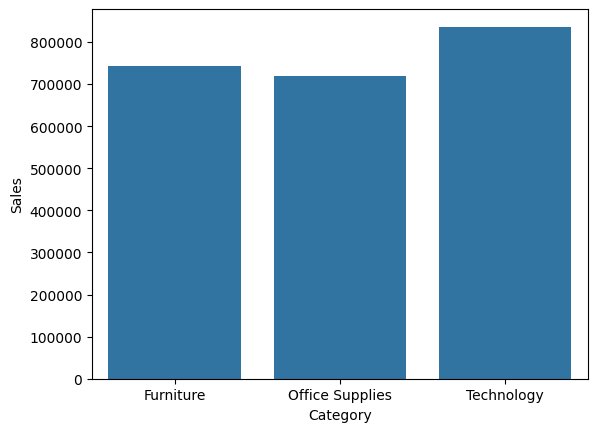

In [84]:
dd=df.groupby('Category')['Sales'].sum().reset_index()
sns.barplot(x='Category',y='Sales',data=dd)
plt.show()

In [85]:
dd=df.groupby('Month')['Sales'].sum().reset_index()
dd

,Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


<Axes: >

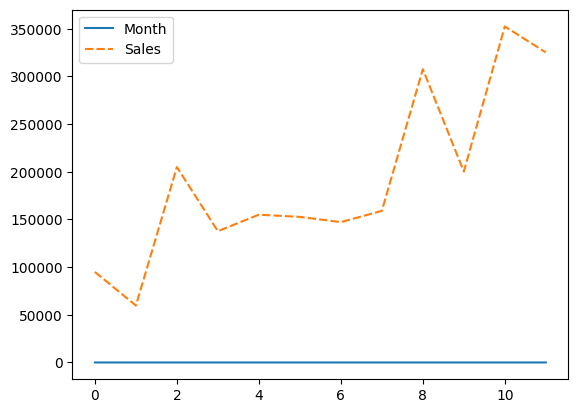

In [86]:
sns.lineplot(data=dd)



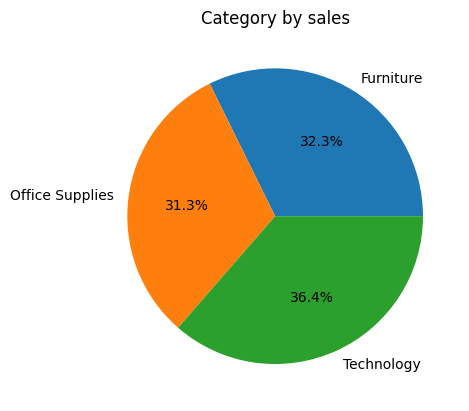

In [87]:
d=df.groupby('Category')['Sales'].sum().reset_index()
plt.pie(x=d['Sales'].values,labels=d['Category'],autopct='%0.1f%%')
plt.title('Category by sales')
plt.show()

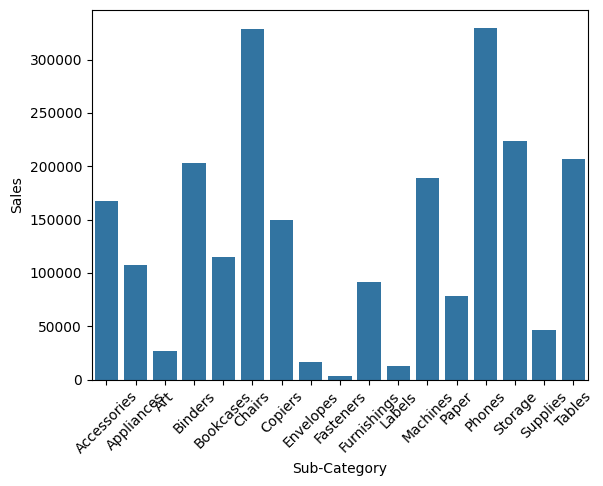

In [88]:
#Now let’s have a look at the sales by sub-category:
dd=df.groupby('Sub-Category')['Sales'].sum().reset_index()
sns.barplot(data=dd,x='Sub-Category',y='Sales')
plt.xticks(rotation=45)
plt.show()

In [89]:
#Now let’s have a look at the profit by category

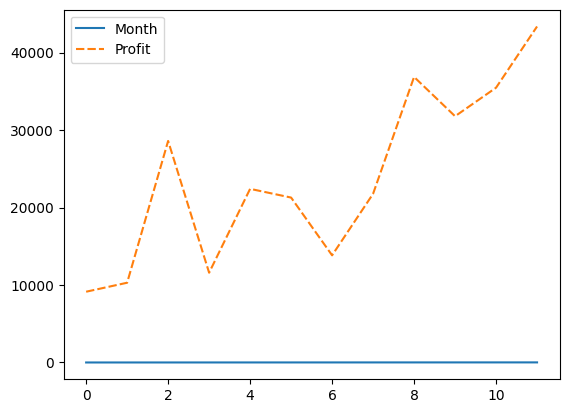

In [90]:
dd=df.groupby('Month')['Profit'].sum().reset_index()
sns.lineplot(data=dd)
plt.show()

In [91]:
#Now let’s have a look at the profit by category

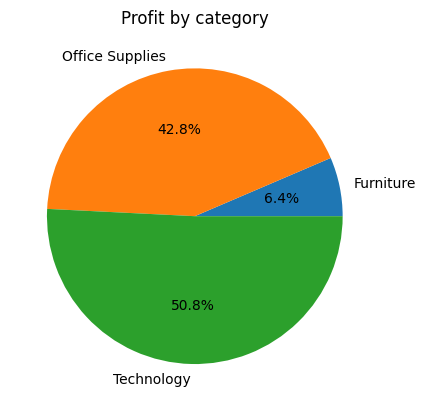

In [92]:
dd=df.groupby('Category')['Profit'].sum().reset_index()
plt.pie(x=dd['Profit'].values,labels=dd['Category'],autopct='%0.1f%%')
plt.title('Profit by category')
plt.show()

In [93]:
#Now let’s have a look at the profit by Sub-category

In [94]:
dd=df.groupby('Sub-Category')['Profit'].sum().reset_index()


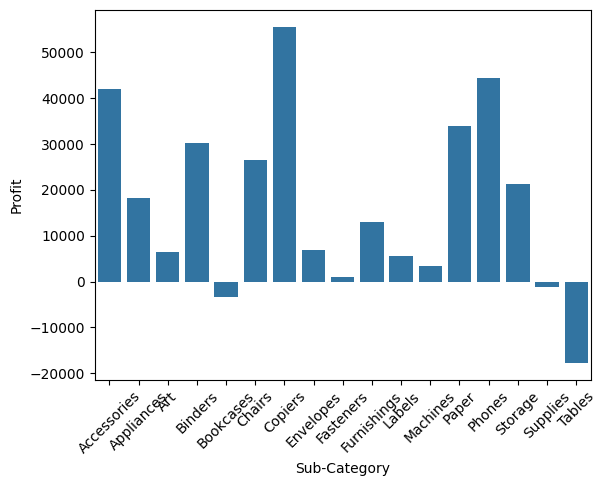

In [95]:
sns.barplot(x='Sub-Category',y='Profit',data=dd)
plt.xticks(rotation=45)
plt.show()

In [96]:
dd=df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
dd


,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


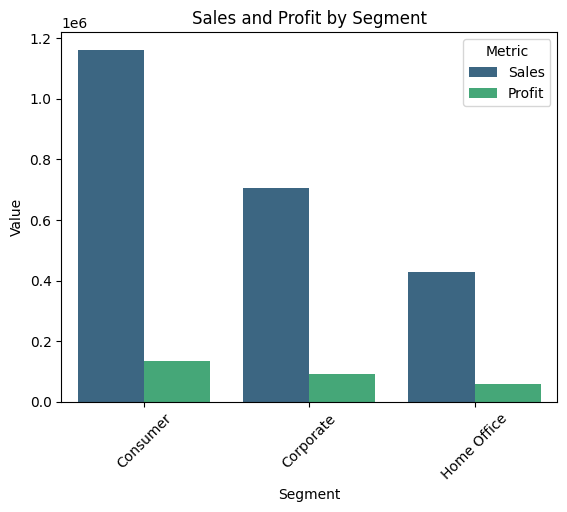

In [97]:
# Melt the DataFrame to reshape it for a grouped bar plot
data_melted = pd.melt(dd, id_vars='Segment', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')

# Create a grouped bar plot
sns.barplot(x='Segment', y='Value', hue='Metric', data=data_melted, palette='viridis')
plt.title('Sales and Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Value')
plt.legend(title='Metric', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [98]:
dd=df.groupby('Category')['Sales'].sum().reset_index()
dd

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


<Axes: xlabel='Category', ylabel='Sales'>

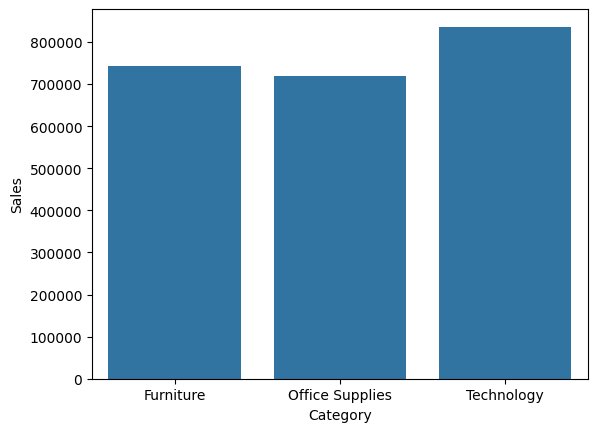

In [99]:
sns.barplot(x='Category',y='Sales',data=dd)